In [1]:
import pandas as pd
import numpy as np


In [3]:
#laoding dataset
data=pd.read_csv("hepatitis_csv.csv")
data.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
age                155 non-null int64
sex                155 non-null object
steroid            154 non-null object
antivirals         155 non-null bool
fatigue            154 non-null object
malaise            154 non-null object
anorexia           154 non-null object
liver_big          145 non-null object
liver_firm         144 non-null object
spleen_palpable    150 non-null object
spiders            150 non-null object
ascites            150 non-null object
varices            150 non-null object
bilirubin          149 non-null float64
alk_phosphate      126 non-null float64
sgot               151 non-null float64
albumin            139 non-null float64
protime            88 non-null float64
histology          155 non-null bool
class              155 non-null object
dtypes: bool(2), float64(5), int64(1), object(12)
memory usage: 22.2+ KB


In [5]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [6]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [8]:
#correlation of the data
correlation=data.corr()
correlation


,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


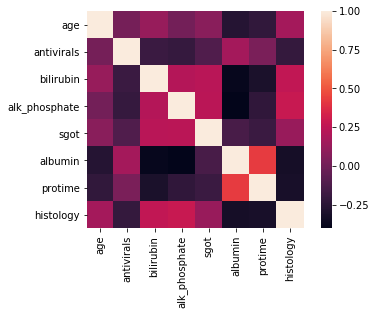

In [11]:
#correlation using visualisation
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(data.corr(),square=True)


In [16]:
#filling missing values using mode(categorical)
from statistics import mode

data.steroid.fillna(mode(data.steroid),inplace=True)
data.fatigue.fillna(mode(data.fatigue),inplace=True)
data.malaise.fillna(mode(data.malaise),inplace=True)
data.anorexia.fillna(mode(data.anorexia),inplace=True)
data.liver_big.fillna(mode(data.liver_big),inplace=True)
data.liver_firm.fillna(mode(data.liver_firm),inplace=True)
data.spleen_palpable.fillna(mode(data.spleen_palpable),inplace=True)
data.spiders.fillna(mode(data.spiders),inplace=True)
data.ascites.fillna(mode(data.ascites),inplace=True)






In [30]:
#filling missing values using mean(numerical)

data['bilirubin'].fillna((data['bilirubin'].mean()), inplace=True)
data['alk_phosphate'].fillna((data['alk_phosphate'].mean()), inplace=True)
data['sgot'].fillna((data['sgot'].mean()), inplace=True)
data['albumin'].fillna((data['albumin'].mean()), inplace=True)
data['protime'].fillna((data['protime'].mean()), inplace=True)

In [39]:
replacements={
              'live':1,
              'die':0
    }
data.replace(replacements,inplace=True)
data.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.000000,85.000000,18.00000,4.000000,61.852273,False,1
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.900000,135.000000,42.00000,3.500000,61.852273,False,1
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.700000,96.000000,32.00000,4.000000,61.852273,False,1
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.700000,46.000000,52.00000,4.000000,80.000000,False,1
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.325397,200.00000,4.000000,61.852273,False,1
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.900000,95.000000,28.00000,4.000000,75.000000,False,1
6,51,female,False,False,True,False,True,True,False,True,True,False,False,1.427517,105.325397,85.89404,3.817266,61.852273,False,0
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.325397,85.89404,3.817266,61.852273,False,1
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.700000,105.325397,48.00000,4.400000,61.852273,False,1
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.325397,120.00000,3.900000,61.852273,False,1


In [35]:
data.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,61.852273,False,1
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,61.852273,False,1
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,61.852273,False,1
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,80.000000,False,1
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,105.325397,200.0,4.0,61.852273,False,1
